In [5]:
# 1. 일반적으로 읽기
path="dataset/bitly_usagov/example.txt"
# data=open(path).readline() # readline(): 첫번째 데이터만 읽어짐
# data=open(path, encoding='utf8').readlines() # readlines(): 전체 데이터라인 읽어짐
# len(data) # 데이터라인 3560개 있음

# 2. json 포맷 읽기
import json
records=[json.loads(line) for line in open(path, encoding='utf8')] 
x=[i for i in list(range(5))]
x

len(records)
# records

3560

In [6]:
records[0]['tz']

'America/New_York'

In [11]:
#모든 tz컬럼 값을 리스트 컴프리헨션 형태로 저장

time_zones=[rec['tz'] for rec in records if 'tz' in rec] 
time_zones[:10] 

len(time_zones) #3440 (전체 3560개 중 120개는 tz 컬럼이 없다)
#상위 10개 추출하여 출력

3440

In [62]:
# 데이터의 동일 도시 건수 세기

def get_counts(sequence):
    counts={}
    for x in sequence:   # x='A/N'
        if x in counts:   # counts 안에 A/N 있어? 없어.. 그럼 else
            counts[x]+=1
        else:
            counts[x]=1  #1
    return counts
counts=get_counts(time_zones)
# time_zones
counts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [63]:
from collections import defaultdict

def get_counts2(sequence):
    counts=defaultdic(int) #값이 0으로 초기화 됨
    for x in sequence:   
            counts[x]+=1
    return counts


def get_counts(sequence):
    counts={}
    for x in sequence:   # x='A/N'
        if x in counts:   # counts 안에 A/N 있어? 없어.. 그럼 else
            counts[x]+=1
        else:
            counts[x]=1  #1
    return counts

counts=get_counts(time_zones)
# time_zones

print(counts)

{'America/New_York': 1251, 'America/Denver': 191, 'America/Sao_Paulo': 33, 'Europe/Warsaw': 16, '': 521, 'America/Los_Angeles': 382, 'Asia/Hong_Kong': 10, 'Europe/Rome': 27, 'Africa/Ceuta': 2, 'Europe/Madrid': 35, 'Asia/Kuala_Lumpur': 3, 'Asia/Nicosia': 1, 'Europe/London': 74, 'Pacific/Honolulu': 36, 'America/Chicago': 400, 'Europe/Malta': 2, 'Europe/Lisbon': 8, 'Europe/Paris': 14, 'Europe/Copenhagen': 5, 'America/Mazatlan': 1, 'Europe/Dublin': 3, 'Europe/Brussels': 4, 'America/Vancouver': 12, 'Europe/Amsterdam': 22, 'Europe/Prague': 10, 'Europe/Stockholm': 14, 'America/Anchorage': 5, 'Asia/Bangkok': 6, 'Europe/Berlin': 28, 'America/Rainy_River': 25, 'Europe/Budapest': 5, 'Asia/Tokyo': 37, 'Europe/Vienna': 6, 'America/Phoenix': 20, 'Asia/Jerusalem': 3, 'Asia/Karachi': 3, 'America/Bogota': 3, 'America/Indianapolis': 20, 'America/Montreal': 9, 'Asia/Calcutta': 9, 'Europe/Skopje': 1, 'Asia/Beirut': 4, 'Australia/NSW': 6, 'Chile/Continental': 6, 'America/Halifax': 4, 'America/Edmonton': 6,

In [64]:
counts['America/New_York']

def top_counts(count_dict, n=10): #n=10은 기본적으로 상위 10개 도시 추출
    vkp=[(count,tz) for tz, count in count_dict.items()]
    vkp.sort()
#     vkp.reverse()
    print(vkp[-n:])  # 뒤에서부터 10개

top_counts(counts) #상위 10개 도시 도출

[(33, 'America/Sao_Paulo'), (35, 'Europe/Madrid'), (36, 'Pacific/Honolulu'), (37, 'Asia/Tokyo'), (74, 'Europe/London'), (191, 'America/Denver'), (382, 'America/Los_Angeles'), (400, 'America/Chicago'), (521, ''), (1251, 'America/New_York')]


In [65]:
from collections import Counter
counts=Counter(time_zones)
counts.most_common(10)#상위 10개 추출

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [66]:
from pandas import DataFrame, Series
import pandas as pd
frame=DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [67]:
frame['tz'] #빈칸 공백, NaN은 바구늬 자체가 없음

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
13                      NaN
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
               ...         
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/New_York
3534        America/

In [68]:
tz_counts=frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [69]:
# NaN -> Missing, '' ->Unkown
clean_tz=frame['tz'].fillna("Missing")
clean_tz[clean_tz==''] = "Unknown"
tz_counts=clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

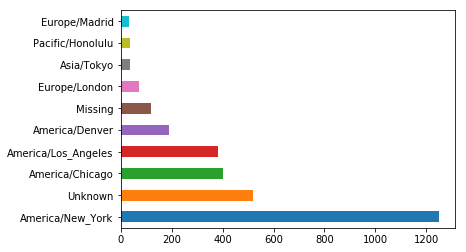

In [70]:
%matplotlib inline
tz_counts[:10].plot(kind="barh")

In [79]:
# len(frame)

for x in frame.a.dropna():
    print(x)
    print("="*50)

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11
GoogleMaps/RochesterNY
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; InfoPath.3)
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, like Gecko) Version/5.1.2 Safari/534.52.7
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/20100101 Firefox/4.0.1
Opera/9.80 (X11; Linux zbov; U; en) Presto/2.10.254 Version/12.00
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
M

Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E; Tablet PC 2.0; MS-RTC LM 8)
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Windows; U; Windows NT 6.1; en-US; rv:1.9.2.27) Gecko/20120216 Firefox/3.6.27
Mozilla/5.0 (Windows NT 6.1; rv:10.0) Gecko/20100101 Firefox/10.0
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; InfoPath.3; .NET4.0C; .NET4.0E)
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0; GTB7.3; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; .NET4.0C; .NET4.0E)
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 1.1.4322; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152

Mozilla/5.0 (Linux; U; Android 2.3.7; en-us; ADR6400L Build/FRG83D; CyanogenMod-7.2.0) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1
Mozilla/5.0 (Windows NT 6.0) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11
Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8) AppleWebKit/534.52.7 (KHTML, like Gecko) Version/5.1.2 Safari/534.52.7
Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.2.3) Gecko/20100401 Firefox/3.6.3 ( .NET CLR 3.5.30729)
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; BOIE9;ENGB)
Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 like Mac OS X; es-es) AppleWebKit/533.17.9 (KHTML, like Gecko) Mobile/8C148 Twitter for iPhone
Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.2 (KHTML, like Gecko) Chrome/15.0.874.106 Safari/535.2
Mozilla/5.0 (iPhone; CPU iPhone OS 5_1 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Mobile/9B179 Twitter for iPhone
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0) Gecko/20100101 Firefo

Mozilla/5.0 (iPad; CPU OS 5_1 like Mac OS X) AppleWebKit/534.46 (KHTML, like Gecko) Mobile/9B176 Twitter for iPad
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; GTB7.3; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (Windows NT 5.1; rv:11.0) Gecko/20100101 Firefox/11.0
Mozilla/5.0 (iPad; U; CPU OS 4_3_5 like Mac OS X; en-us) AppleWebKit/533.17.9 (KHTML, like Gecko) Mobile/8L1
Mozilla/5.0 (Windows NT 6.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident/4.0; GTB7.3; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30729; Media Center PC 6.0; eSobiSubscriber 2.0.4.16; BRI/1; .NET4.0C; BRI/2)
Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (compatible; MSIE 9.0; Windows Phone OS 7.5; Trident/5.0; IEMobile/9.0; HTC; USCCHTC-PC93100; USC-US)
Mozilla/4.0 (compati

In [81]:
# len(frame)

results=Series([x.split()[0] for x in frame.a.dropna()])
# frame의 a컬럼의 값이 nan인 행을 제외한 다음,
# frame의 a컬럼의 값을 x에게 대입
# x에 저장된 문자열을 공백으로 구분
# 구분된 문자열의 0번 인덱스 값을 추출하여 리스트의 요소로 해라.
# 리스트를 시리즈 함수의 인수로 전달하여 시리즈 객체를 생성하라
results

# 모든 a 칼럼 중에서 앞에서부터 시작해서 공백전까지 내용이 저장됨
    

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
5                  Mozilla/5.0
6                  Mozilla/5.0
7                  Mozilla/5.0
8                   Opera/9.80
9                  Mozilla/5.0
10                 Mozilla/5.0
11                 Mozilla/5.0
12                 Mozilla/5.0
13                 Mozilla/5.0
14                 Mozilla/5.0
15                 Mozilla/5.0
16                 Mozilla/5.0
17      GoogleMaps/RochesterNY
18                 Mozilla/5.0
19                 Mozilla/5.0
20                 Mozilla/5.0
21                 Mozilla/4.0
22                 Mozilla/5.0
23                 Mozilla/5.0
24                 Mozilla/5.0
25                 Mozilla/5.0
26                 Mozilla/5.0
27                 Mozilla/5.0
28                 Mozilla/5.0
29                 Mozilla/5.0
                 ...          
3410               Mozilla/5.0
3411    

In [82]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [83]:
cframe=frame[frame.a.notnull()] #NaN을 제외
len(cframe)

3440

In [91]:
cframe.a
# a컬럼에 'Windows'가 있는지 조사하고 싶다 -> Windows 단어가 있으면 전체 문자열을 Windows로 치환, 없으면 not windows로 치환


import numpy as np
o_s=np.where(cframe['a'].str.contains("Windows"),"Windows" , "Not Windows")
o_s[:5]
#np.where(조건, 참, 거짓)
# "Windows Mac IOS".contains["Dos"]



array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'],
      dtype='<U11')

In [94]:
cframe['tz']

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
5          America/New_York
6             Europe/Warsaw
7                          
8                          
9                          
10      America/Los_Angeles
11         America/New_York
12         America/New_York
14         America/New_York
15           Asia/Hong_Kong
16           Asia/Hong_Kong
17         America/New_York
18           America/Denver
19              Europe/Rome
20             Africa/Ceuta
21         America/New_York
22         America/New_York
23         America/New_York
24            Europe/Madrid
25        Asia/Kuala_Lumpur
26             Asia/Nicosia
27        America/Sao_Paulo
28                         
29                         
30            Europe/London
               ...         
3529       America/New_York
3530    America/Los_Angeles
3531                       
3532       America/New_York
3533       America/N

In [98]:
by_tz_os=cframe.groupby(['tz',o_s])
by_tz_os.size() #size(): 그룹별 합계를 구하는 함수
agg_counts=by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [103]:
# agg_counts.sum(axis=1) #default는 axis=0
agg_counts.sum(axis=1).argsort() #오름차순정렬하는데 원데이터가 어디 위치에 있었는지 알려줌

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
America/Bogota                    62
America/Caracas                   34
America/Chicago                   60
America/Chihuahua                 36
America/Costa_Rica                37
America/Denver                    27
America/Edmonton                  76
America/Guayaquil                 56
America/Halifax                   89
America/Indianapolis               2
America/La_Paz                     4
America/Lima                       5
America/Los_Angeles                7
America/Managua                    8
America/Mazatlan                   9
America/Mexico_City               86
America/Monterrey                 1

In [110]:
indexer=agg_counts.sum(axis=1).argsort()
indexer[-10:]

tz
Europe/Sofia        35
Europe/Stockholm    78
Europe/Uzhgorod     96
Europe/Vienna       59
Europe/Vilnius      77
Europe/Volgograd    15
Europe/Warsaw       22
Europe/Zurich       12
Pacific/Auckland     0
Pacific/Honolulu    29
dtype: int64

In [114]:
count_subset=agg_counts.take(indexer)[-10:]
# 잘라내는 함수 take
# agg_counts에 take를 적용해서 행을 정렬된 순서 그래도 선택하고 
# 마지막 10개 행만 잘라낸다

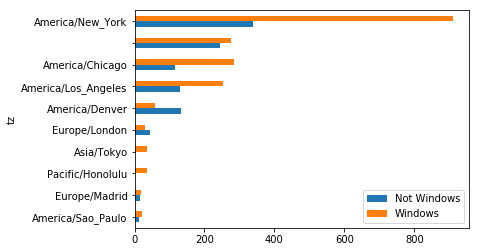

In [116]:
count_subset.plot(kind="barh")

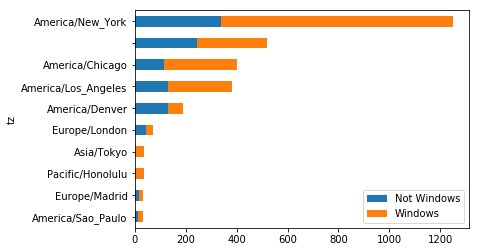

In [117]:
count_subset.plot(kind="barh", stacked=True) # 중첩막대그래프

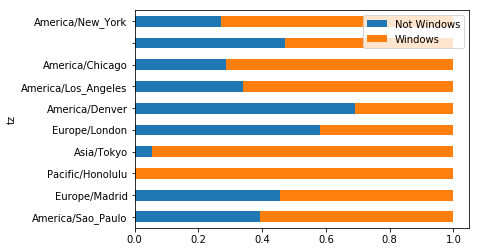

In [119]:
# 상대의 비율을 확인하기 어려우므로 각 행의 총합을 1로 정규화한 다음 출력
normed_subset=count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind="barh", stacked=True)